In [1]:
# Numpy and Pandas 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from math import sqrt

In [2]:
# Viz Lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
data=pd.read_csv('day.csv',parse_dates=['dteday'])

In [5]:
data.shape

(730, 16)

In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,2019-12-27,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,2019-12-31,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [8]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
duplicate=data.duplicated() # No duplicates observed 
print(duplicate)

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool


In [11]:
data.duplicated().sum() # Sum is 0 

0

In [12]:
data.isna().sum() # Sum is 0 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Removing unwanted features 
# Instant is like index no 
# Date data is splited into day and month and year 
# Lets check for casual	registered	cnt. cnt = casual + registered 

In [14]:
data.columns # columns names 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
df_total=data[['casual','registered','cnt']]
df_total['Sum']=df_total['casual']+df_total['registered']
df_total.head() # Cnt and sum is matching 


,casual,registered,cnt,Sum
0,331,654,985,985
1,131,670,801,801
2,120,1229,1349,1349
3,108,1454,1562,1562
4,82,1518,1600,1600


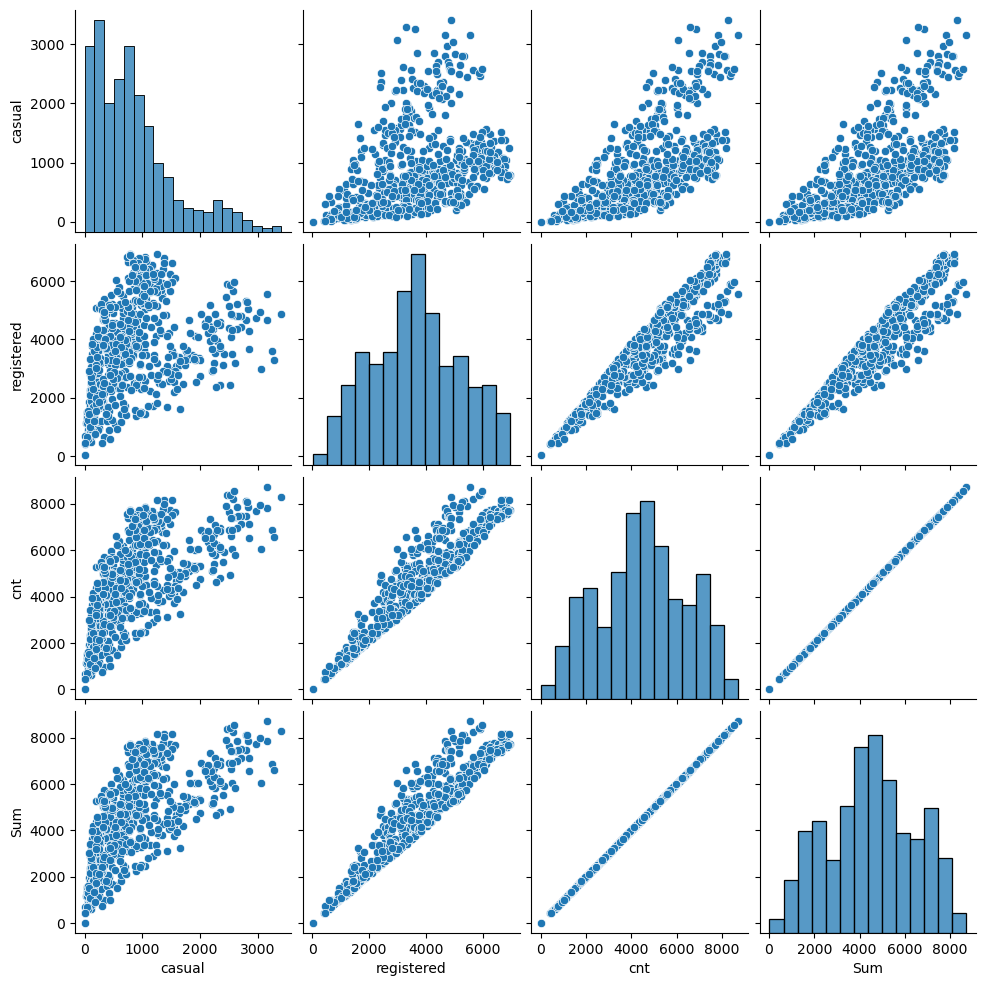

In [16]:
sns.pairplot(df_total) # Cnt and sum is having strong co relation 

In [17]:
# Lets check co relation 
df_total.corr() # Cnt and sum is having co relation as 1  Hence can be removed form the data set 

,casual,registered,cnt,Sum
casual,1.000000,0.394137,0.672123,0.672123
registered,0.394137,1.000000,0.945411,0.945411
cnt,0.672123,0.945411,1.000000,1.000000
Sum,0.672123,0.945411,1.000000,1.000000


<AxesSubplot:>

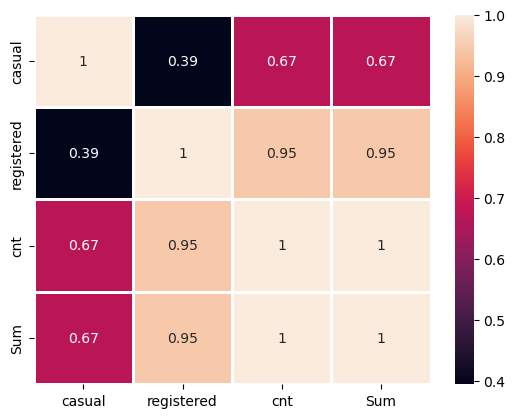

In [18]:
# Lets create heat map 
sns.heatmap(df_total.corr(),annot=True,linewidths=1) # linewidths Gap between boxes , annot= Values inside box 

# Remove  features 


In [19]:
# Instant , datetime , casual ,registered which are not contributing to data set 

In [20]:
data.shape

(730, 16)

In [21]:
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [22]:
data.shape # 4 features removed 

(730, 12)

In [23]:
data.head(12)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


# Change the name in catgeory 

In [24]:
# data.season.value_counts() # Values are ranging from 1 to 4 
data.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)
data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'),inplace=True)
data.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),inplace=True)
data.weathersit.replace((1,2,3,4),('Good','Avg','Bad','Very Bad'),inplace=True)


In [25]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Avg,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Avg,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


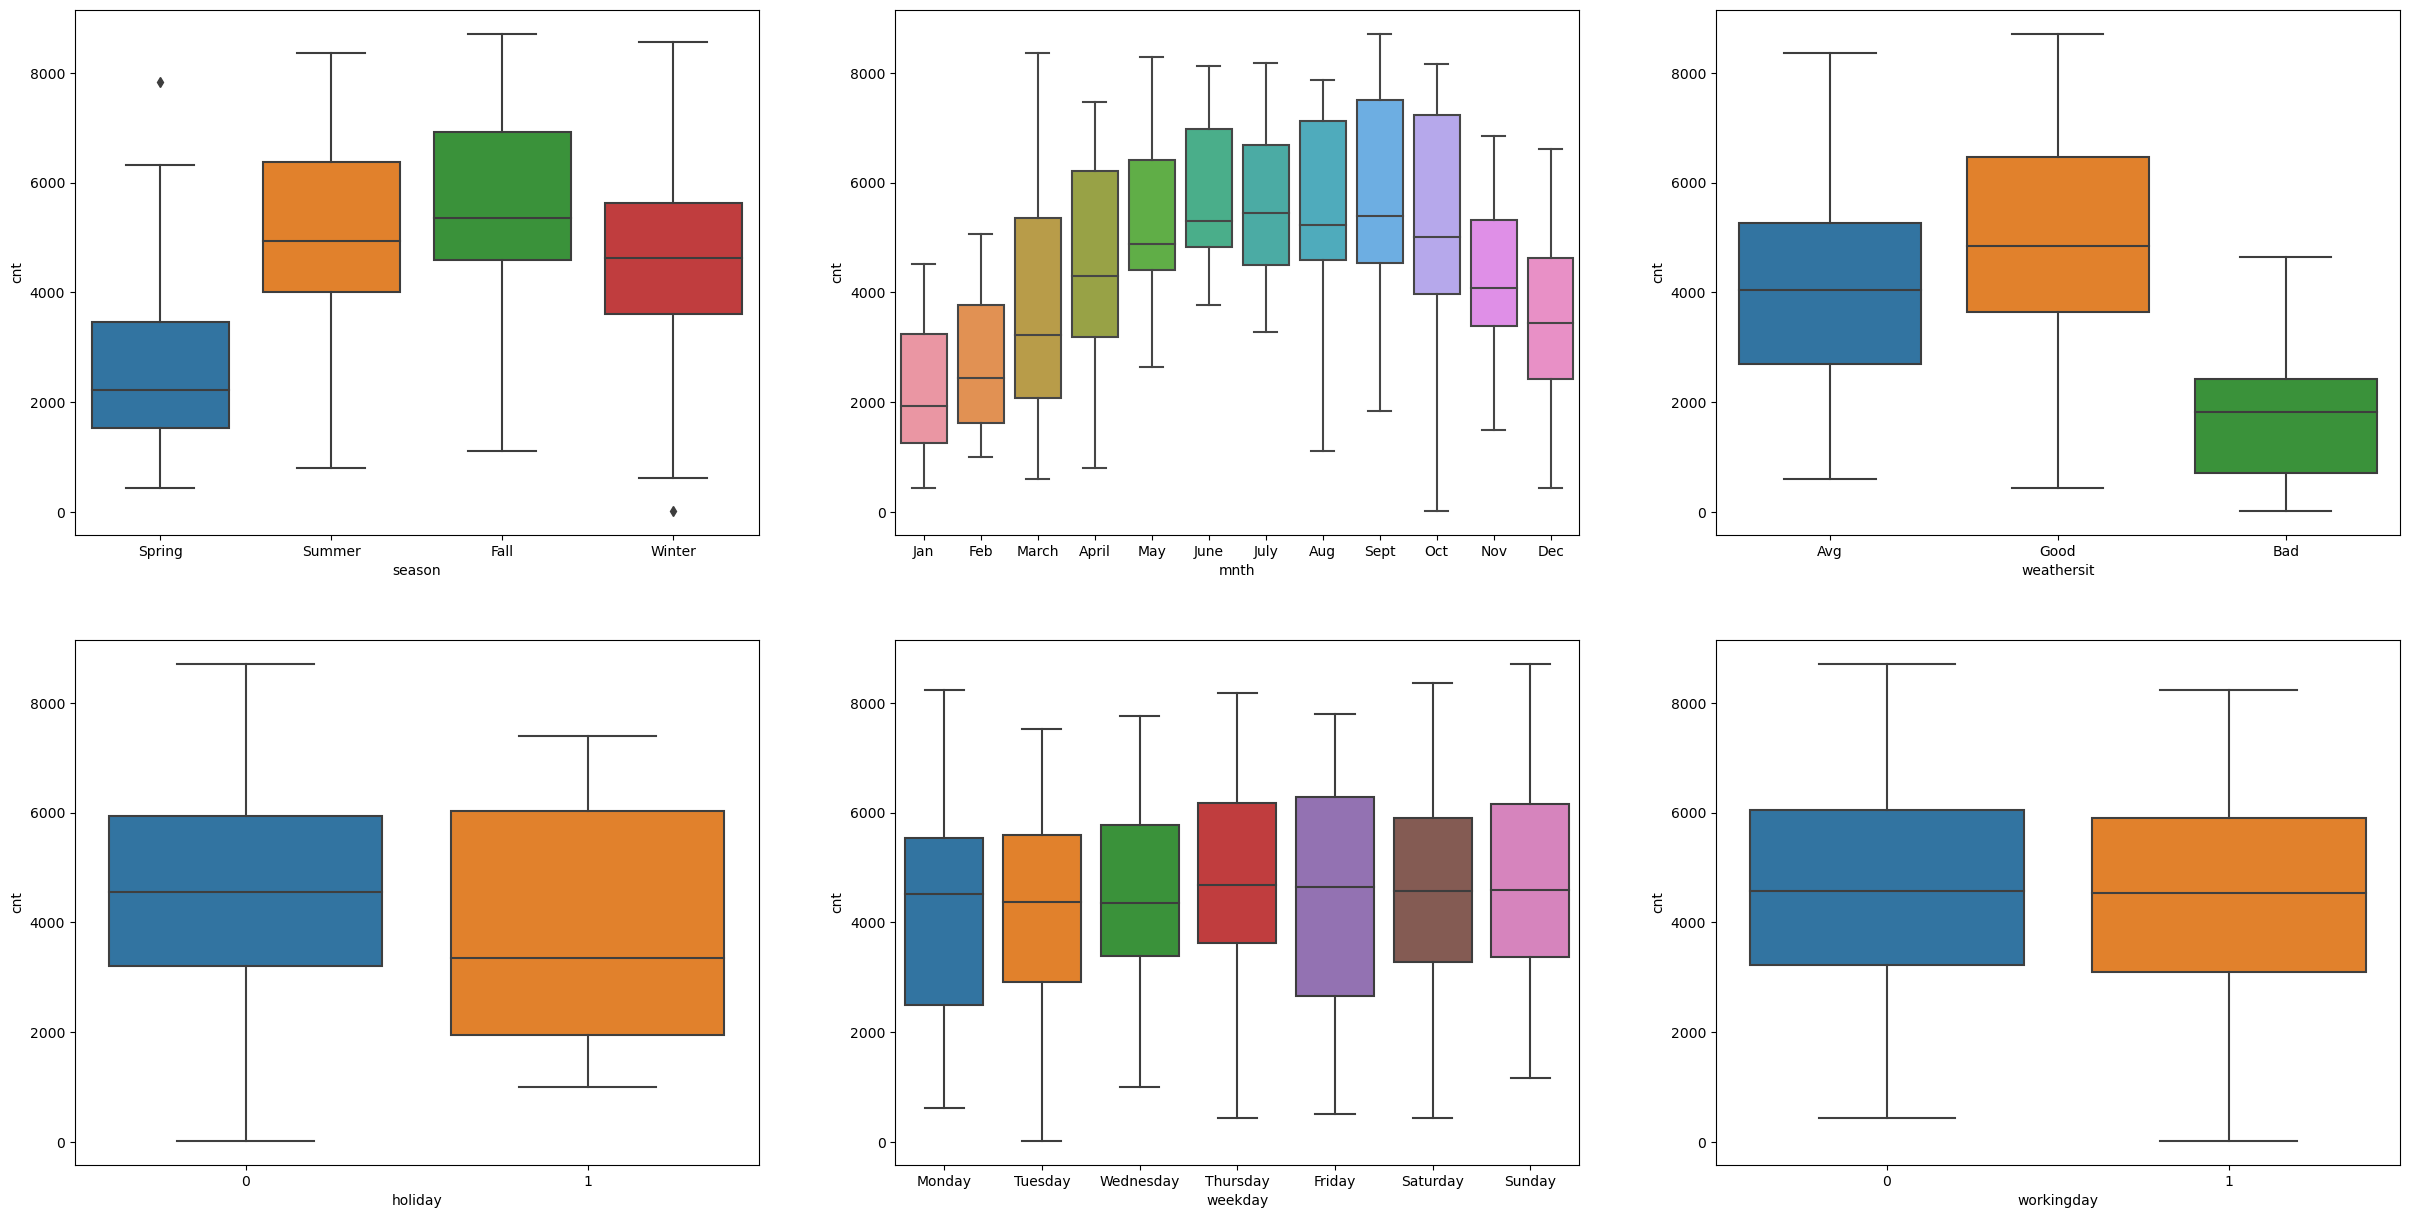

In [26]:
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.show()

In [27]:
#def stats(col):
col_df=data.groupby('season')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


In [28]:
data.cnt.sum()

3290845

In [29]:
col_df['sum']

season
Fall      1061129
Summer     918589
Winter     841613
Spring     469514
Name: sum, dtype: int64

<AxesSubplot:xlabel='season', ylabel='cnt'>

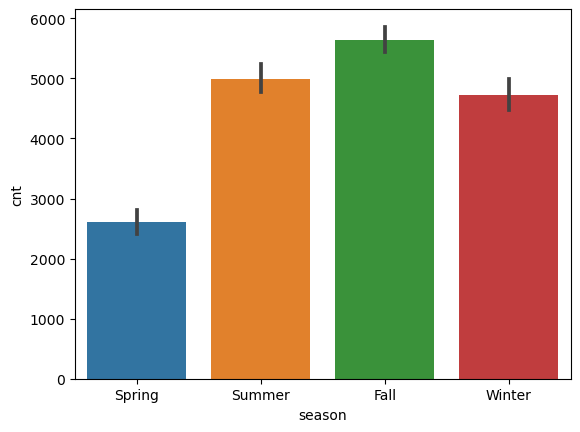

In [30]:
sns.barplot('season','cnt',data=data)

In [31]:
col_df=data.groupby('mnth')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100

col_df.round(2)

,sum,mean,count,persum,percount
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
June,346342,5772.37,60,10.52,8.22
Sept,345991,5766.52,60,10.51,8.22
July,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
April,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
March,228920,3692.26,62,6.96,8.49


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

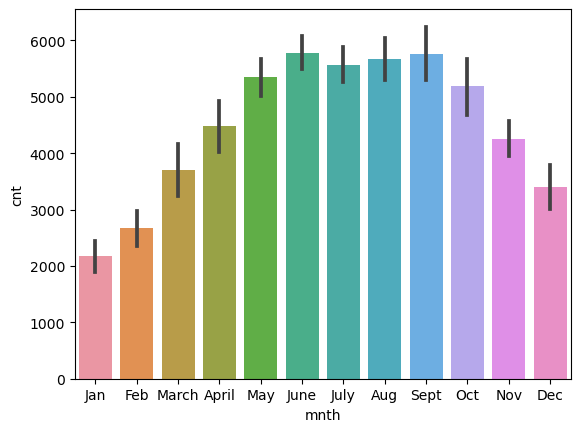

In [32]:
sns.barplot('mnth','cnt',data=data)

In [33]:
col_df=data.groupby('weathersit')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
weathersit,,,,,
Good,2257952,4876.79,463,68.61,63.42
Avg,995024,4044.81,246,30.24,33.70
Bad,37869,1803.29,21,1.15,2.88


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

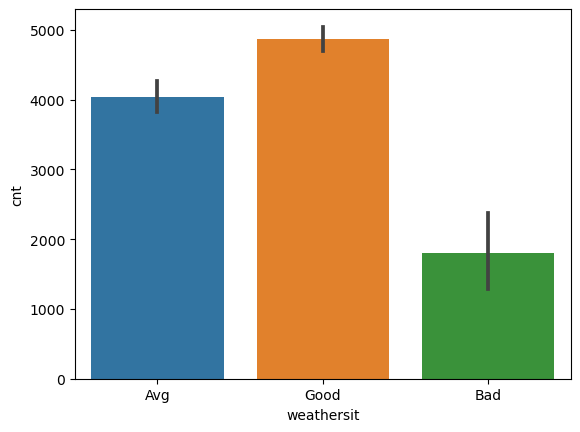

In [34]:
sns.barplot('weathersit','cnt',data=data)

In [35]:
 col_df=data.groupby('weekday')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

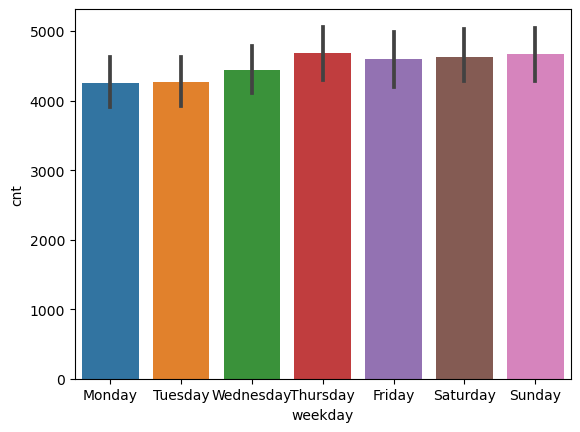

In [36]:
sns.barplot('weekday','cnt',data=data)

In [37]:
 col_df=data.groupby('holiday')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

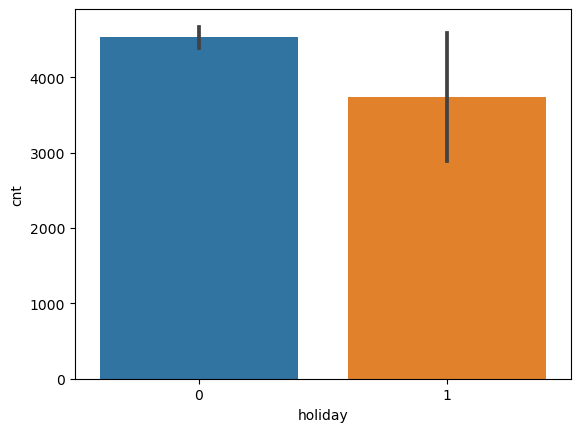

In [38]:
sns.barplot('holiday','cnt',data=data)

In [39]:
 col_df=data.groupby('workingday')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

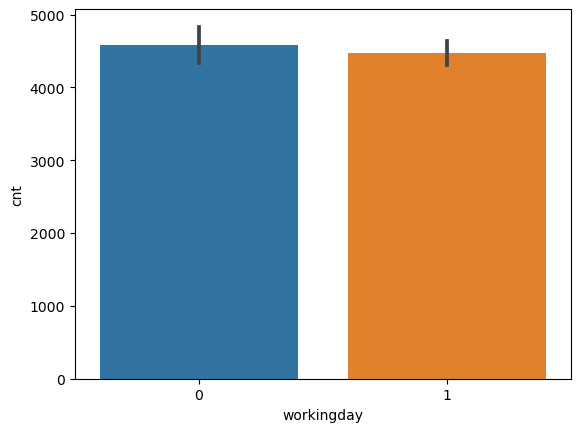

In [40]:
sns.barplot('workingday','cnt',data=data)

In [41]:
 col_df=data.groupby('yr')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


<AxesSubplot:xlabel='yr', ylabel='cnt'>

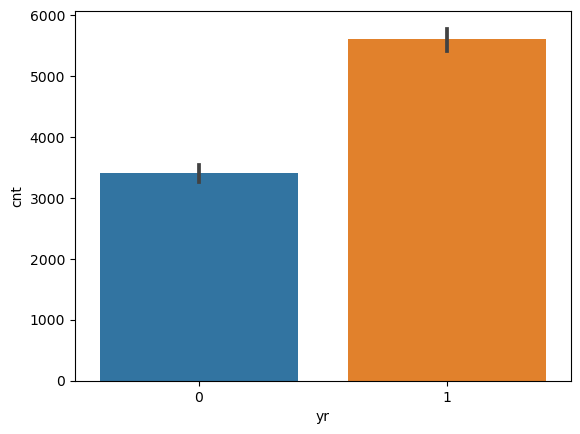

In [42]:
sns.barplot('yr','cnt',data=data)

In [43]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [44]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Avg,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Avg,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [45]:
# Numaric varaible are temp	atemp	hum	windspeed	cnt
numaric_data=data[['temp','atemp','hum','windspeed','cnt']]
numaric_data

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


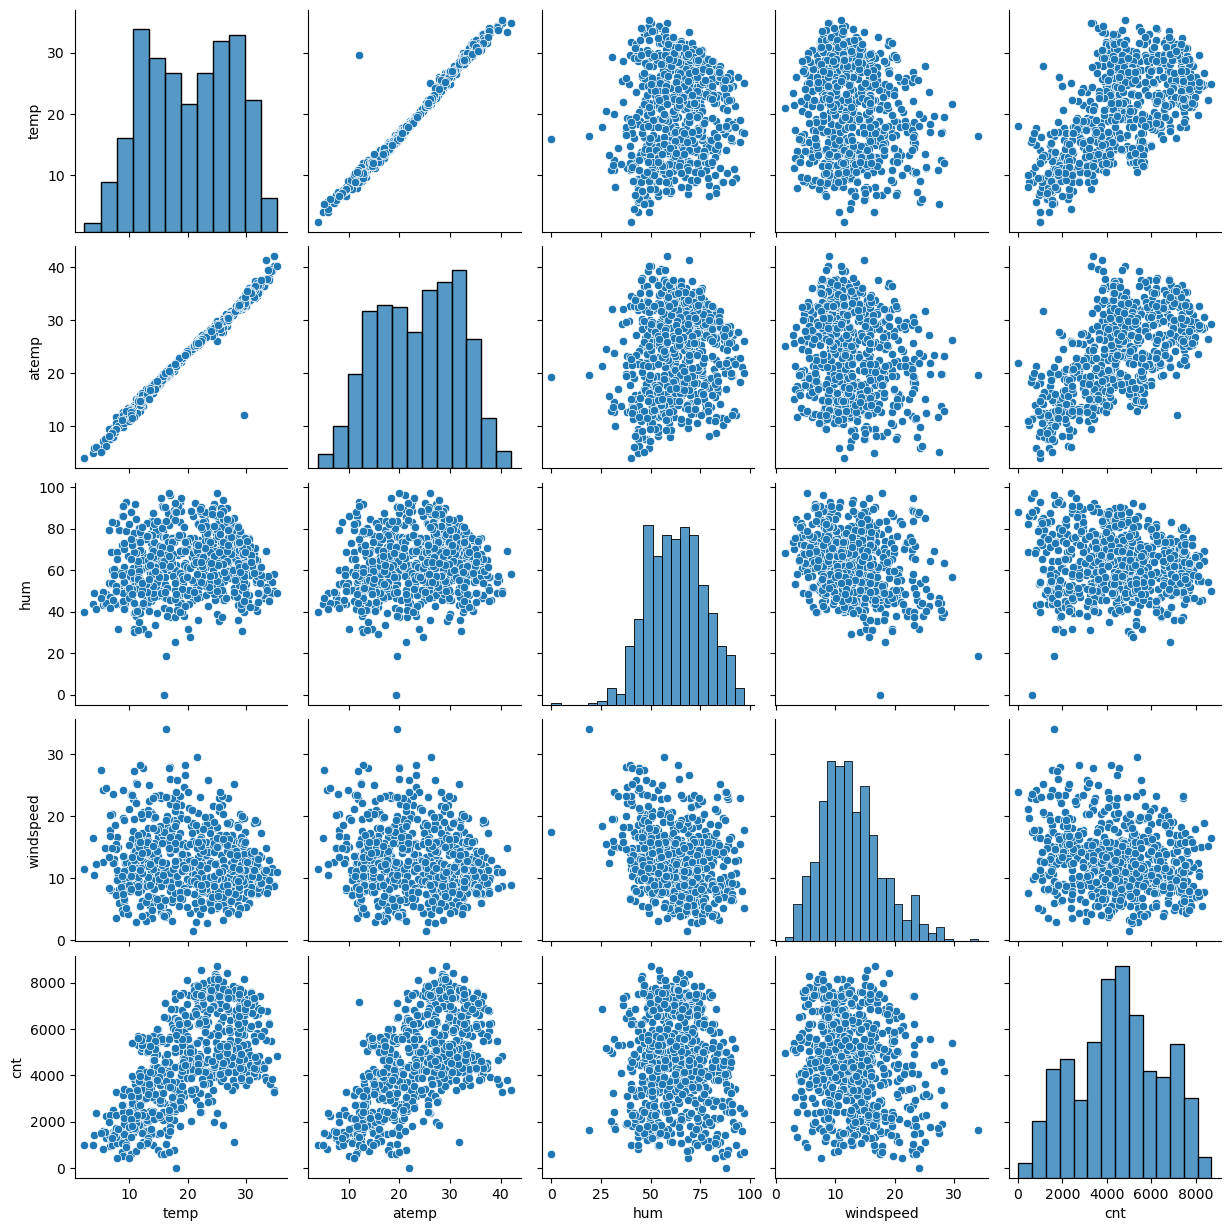

In [46]:
sns.pairplot(numaric_data)
plt.show()

In [47]:
numaric_data.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

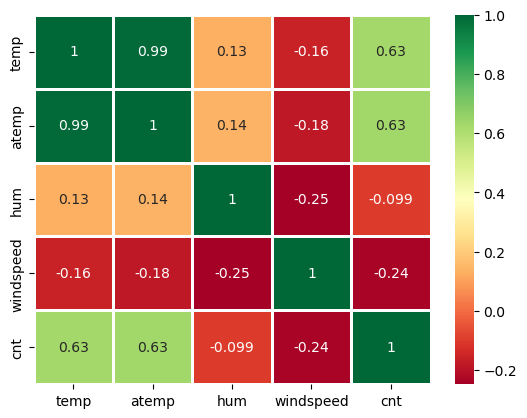

In [48]:
sns.heatmap(numaric_data.corr(),annot=True,cmap="RdYlGn",linewidths=1)

# temp and atemp are strongly corelated and need to select any one of them based on VIF 

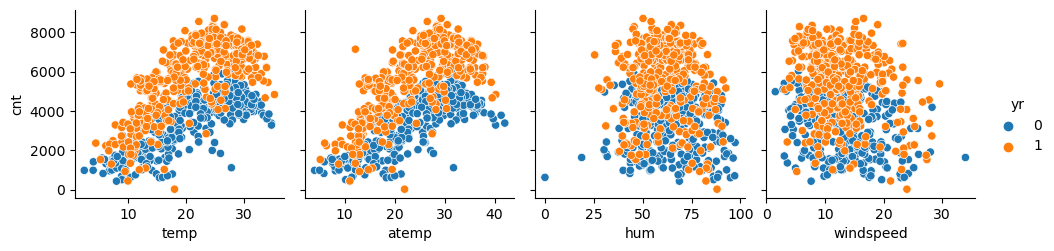

In [49]:
sns.pairplot(x_vars=['temp','atemp','hum','windspeed'],y_vars=['cnt'],data=data,hue='yr')
# Impact of year , Cat Variable against cnt increase in count 

In [50]:
# Create Dataframe for Cat variable - Get Dummies 

In [51]:
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Avg,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Avg,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [52]:
season=pd.get_dummies(data['season'],drop_first=True) # Falls Drop Out 
weather=pd.get_dummies(data['weathersit'],drop_first=True) # Avg Dropout 
month=pd.get_dummies(data['mnth'],drop_first=True) # April Dropped 
weekday=pd.get_dummies(data['weekday'],drop_first=True) # Friday Got dropped 

# Droping frsit column is avoid Dummy Variable trap 


In [53]:
# Merge these data Frames 
data_new=pd.concat([data,season,weather,month,weekday],axis=1)
data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Monday,1,Avg,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,Spring,0,Jan,0,Tuesday,1,Avg,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,Spring,0,Jan,0,Wednesday,1,Good,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,Thursday,1,Good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Friday,1,Good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data_new.shape

(730, 34)

In [55]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Spring      730 non-null    uint8  
 13  Summer      730 non-null    uint8  
 14  Winter      730 non-null    uint8  
 15  Bad         730 non-null    uint8  
 16  Good        730 non-null    uint8  
 17  Aug         730 non-null    uint8  
 18  Dec         730 non-null    uint8  
 19  Feb         730 non-null    u

In [56]:
# Delete unwanted columns - Season ,month ,weekday,weather as data is populated in the data frame through get dummies 
data_new.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
data_new


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,0,0,0,0,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,1,0,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
data_new.shape # Earlier 34 features were present 

(730, 30)

In [58]:
#data_new.info()

# Spliting the data for Training and Testing 

In [59]:
bike_train,bike_test=train_test_split(data_new,train_size=0.7,random_state=42)

In [60]:
bike_train.shape

(510, 30)

In [61]:
bike_test.shape

(220, 30)

# Scaling 

In [62]:
scaler=MinMaxScaler()
# Sclaer need to apply on numaric data and not on Encoded data . Need to create another varaible for Scaling 
num_var=['temp','atemp','hum','windspeed','cnt']
print(num_var)
bike_train[num_var]=scaler.fit_transform(bike_train[num_var])

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [63]:
bike_train.head(3) # Minmax applied on the dataset for numaric column 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,0,0,0,0,0,0,0,1
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
# Lets check co -relation coeff for data set after scaling 


<AxesSubplot:>

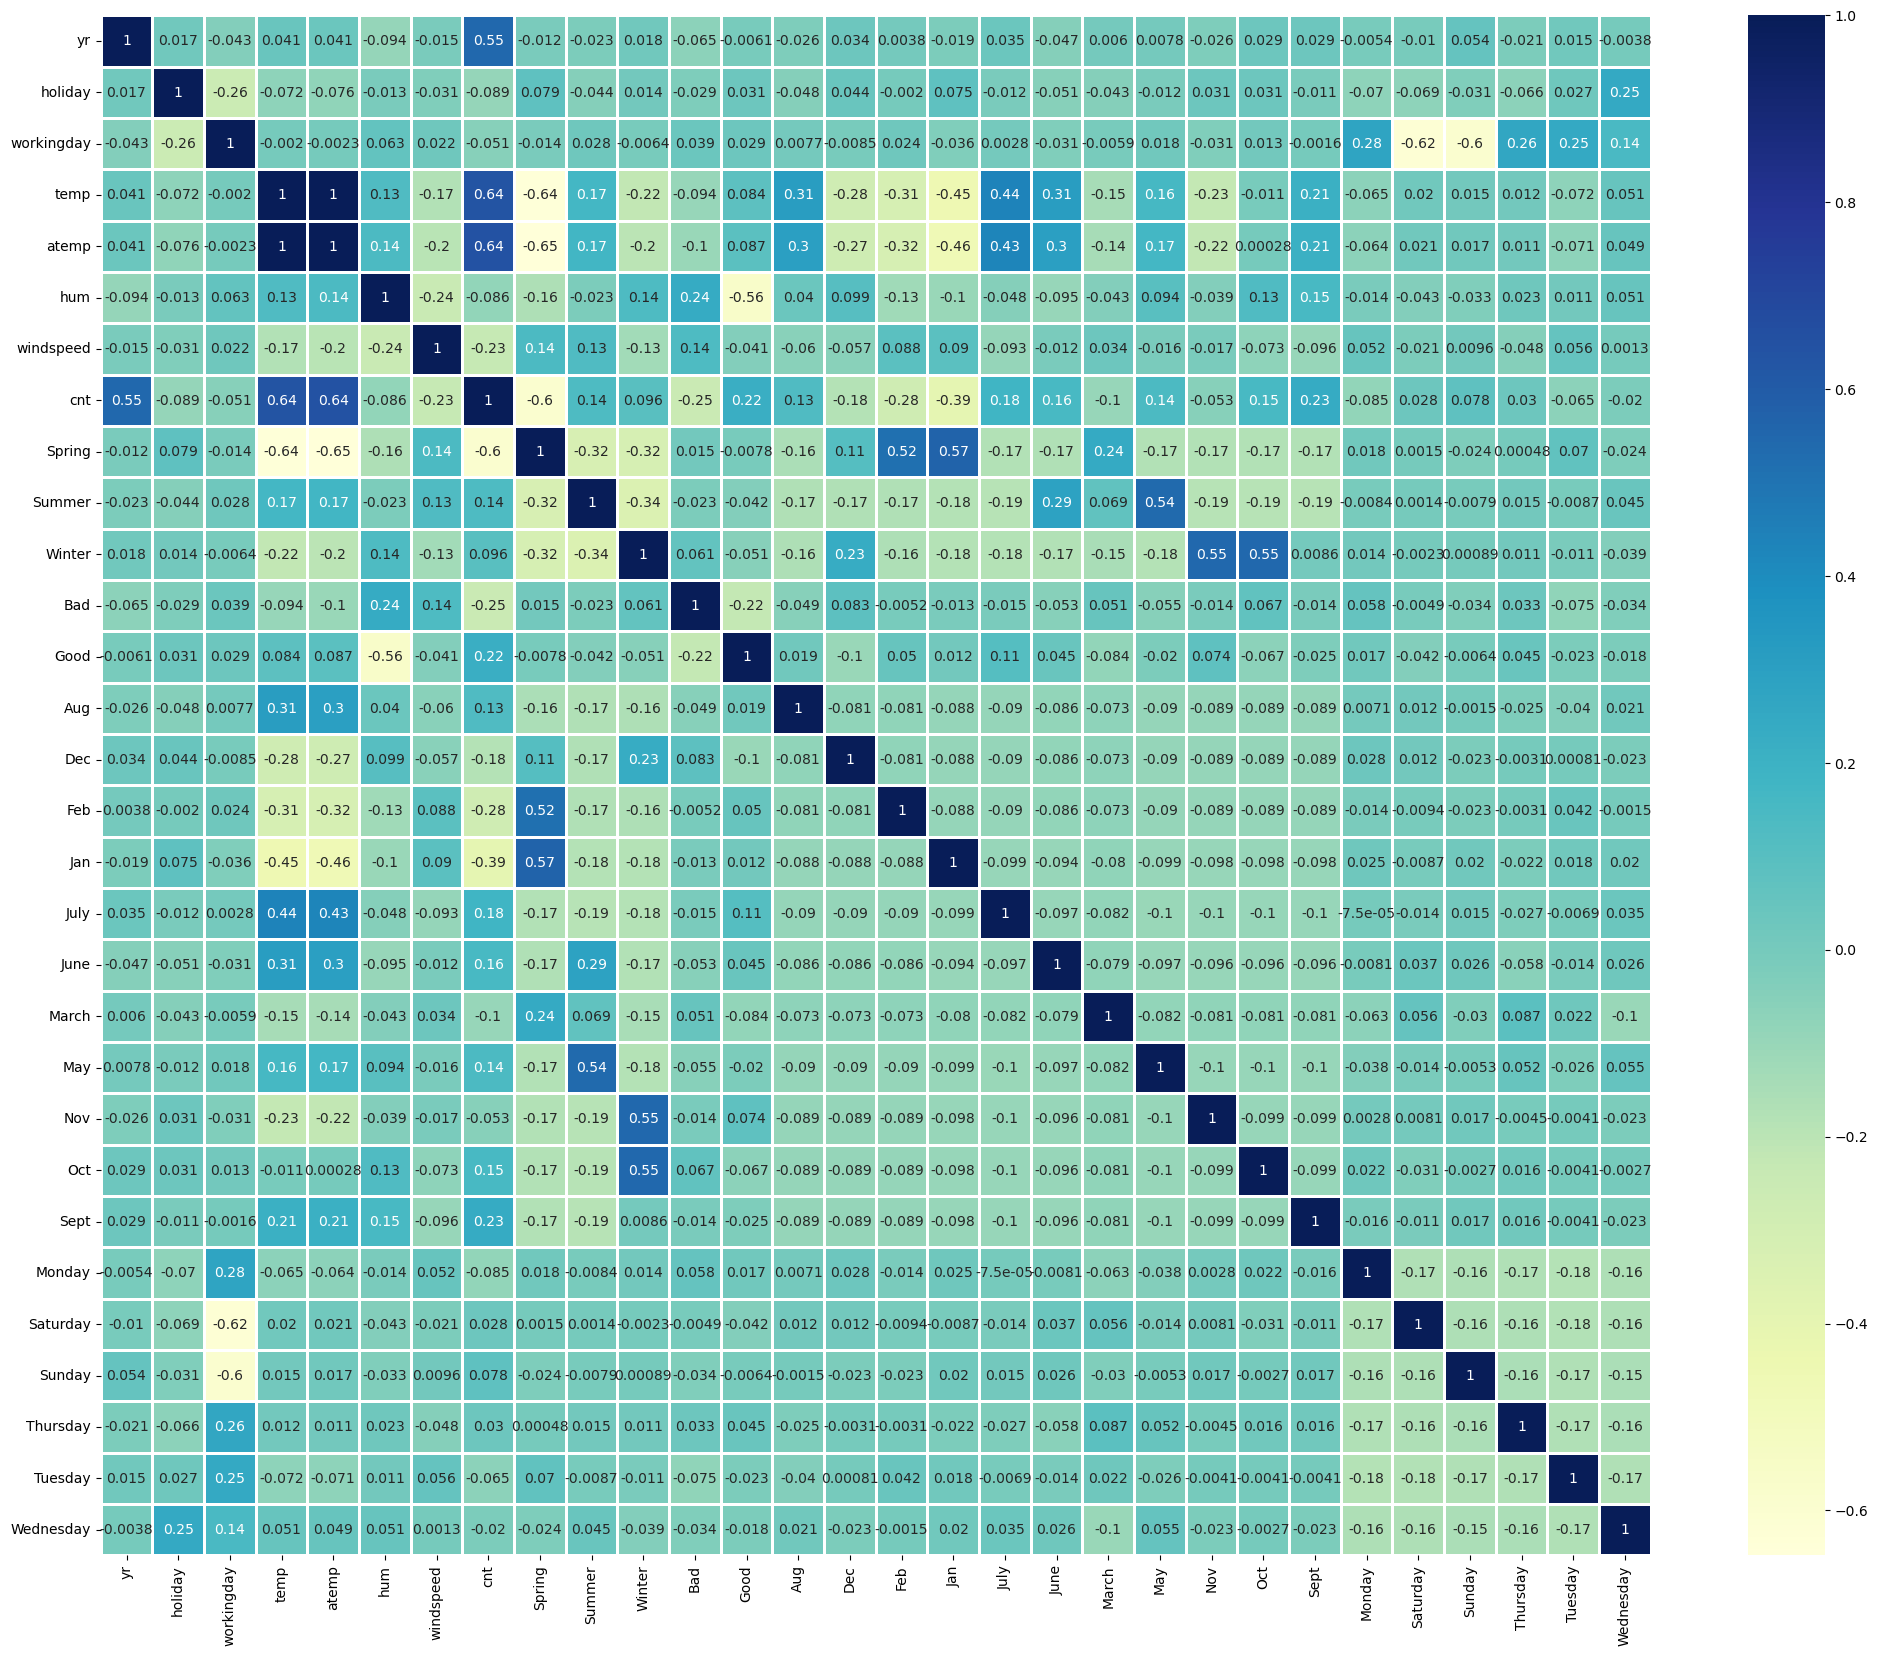

In [65]:
plt.figure(figsize=(25,20))
sns.heatmap(bike_train.corr(),annot=True,cmap='YlGnBu',linewidths=1)

# Insights 

- Temp and atemp have strong corelation ** 
- Working day Saturday and Sunday have - ve corelatioship -0.62 and 0.6 ** 
- Spring and count having - ve corelation -0.6 # 
- Temp and atemp + ve corelation with cnt 0.64 # 
- Humidity and Good wather condition is having corelation 0.6 ** 


# Moel Building 

In [66]:
y_train=bike_train.pop('cnt')
X_train=bike_train

In [67]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,0,0,0,1
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,0,0,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,1,0,0,0,0,1,0,0
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [68]:
y_train.shape # y train 

(510,)

In [69]:
X_train.shape # X train Matching 

(510, 29)

# Model Building 

In [70]:
model=LinearRegression() # # https://www.youtube.com/watch?v=POCvLGRLDzM
rfe=RFE(model)
fit=rfe.fit(X_train,y_train)


In [71]:
fit.n_features_

14

In [72]:
fit.support_

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False])

In [73]:
fit.ranking_


array([ 1,  1, 11,  1,  1,  1,  1,  1,  8,  1,  1,  1, 13,  1,  9, 15,  1,
       10,  2,  3,  1,  4,  1,  5, 12, 14, 16,  7,  6])

In [74]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Bad', 'Good', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sept', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [75]:
col=X_train.columns[fit.support_] # Columns selected 
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Bad', 'Good', 'Dec', 'July', 'Nov', 'Sept'],
      dtype='object')

In [76]:
X_train.columns[~fit.support_] # Columns Rejected 

Index(['workingday', 'Summer', 'Aug', 'Feb', 'Jan', 'June', 'March', 'May',
       'Oct', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [77]:
X_train.drop(['workingday', 'Summer', 'Aug', 'Feb', 'Jan', 'June', 'March', 'May',
       'Oct', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],axis=1,inplace=True)

In [78]:
X_train.head(1)

,yr,holiday,temp,atemp,hum,windspeed,Spring,Winter,Bad,Good,Dec,July,Nov,Sept
645,1,1,0.403972,0.404998,0.731215,0.419004,0,1,0,0,0,0,0,0


# Model development using Statmodel 

In [79]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [80]:
calculateVIF(X_train)

,Features,VIF
3,atemp,1228.43
2,temp,1192.29
4,hum,20.33
5,windspeed,5.50
9,Good,3.28
6,Spring,2.92
7,Winter,2.78
0,yr,2.08
12,Nov,1.85
11,July,1.48


In [81]:
# Adding constant for intercept 

In [82]:
X_train_lm1 = sm.add_constant(X_train) # Const added 
X_train_lm1.head(1)


,const,yr,holiday,temp,atemp,hum,windspeed,Spring,Winter,Bad,Good,Dec,July,Nov,Sept
645,1.0,1,1,0.403972,0.404998,0.731215,0.419004,0,1,0,0,0,0,0,0


In [83]:
print(X_train.shape)

(510, 14)


In [84]:
lr1=sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.79e-185
Time:                        09:57:11   Log-Likelihood:                 481.72
No. Observations:                 510   AIC:                            -933.4
Df Residuals:                     495   BIC:                            -869.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2878      0.041      6.993      0.0

In [85]:
# Vif for Temp and atemp is more  will drop atemp ----------------------------------------------------

In [86]:
X_train_new = X_train.drop(['atemp'], axis = 1)

In [87]:
X_train_new.head(1)

,yr,holiday,temp,hum,windspeed,Spring,Winter,Bad,Good,Dec,July,Nov,Sept
645,1,1,0.403972,0.731215,0.419004,0,1,0,0,0,0,0,0


In [88]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,19.33
3,hum,19.00
4,windspeed,5.18
8,Good,3.20
5,Spring,2.92
6,Winter,2.76
0,yr,2.08
11,Nov,1.85
10,July,1.48
9,Dec,1.37


In [89]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          5.89e-186
Time:                        09:57:11   Log-Likelihood:                 480.11
No. Observations:                 510   AIC:                            -932.2
Df Residuals:                     496   BIC:                            -872.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2951      0.041      7.192      0.0

In [90]:
# Drop Humidity  as  Mangnitude for temp is high
X_train_new = X_train_new.drop(['hum'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.18
3,windspeed,5.03
7,Good,2.82
5,Winter,2.34
0,yr,2.08
4,Spring,1.82
10,Nov,1.81
9,July,1.42
8,Dec,1.31
11,Sept,1.23


In [91]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.46e-183
Time:                        09:57:11   Log-Likelihood:                 471.64
No. Observations:                 510   AIC:                            -917.3
Df Residuals:                     497   BIC:                            -862.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1726      0.029      6.055      0.0

In [92]:
# Drop windspeed  as  Mangnitude for temp is high
X_train_new = X_train_new.drop(['windspeed'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.87
6,Good,2.80
4,Winter,2.33
0,yr,2.07
9,Nov,1.78
3,Spring,1.42
8,July,1.38
7,Dec,1.31
10,Sept,1.22
5,Bad,1.08


In [93]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.2
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.10e-181
Time:                        09:57:11   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -902.7
Df Residuals:                     498   BIC:                            -851.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1157      0.025      4.591      0.0

- Hypothesis Testing :
- Hypothesis Testing States that
- H0:B1=B2=...=Bn=0
- H1: at least one Bi!=0

In [94]:
lr4.params # Getting parameters 

const      0.115714
yr         0.241877
holiday   -0.074930
temp       0.429731
Spring    -0.151378
Winter     0.092636
Bad       -0.198298
Good       0.083368
Dec       -0.065862
July      -0.053647
Nov       -0.085917
Sept       0.048976
dtype: float64

- Insight: From the lr6 model summary, it is evident that all our coefficients are not equal to zero, 
- which means we REJECT the NULL HYPOTHESIS

- Model Validation
- Validating the assumption of Linear Regression Model :

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

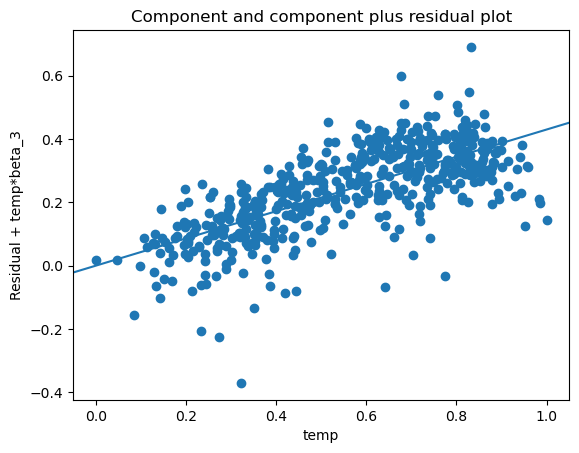

In [95]:
sm.graphics.plot_ccpr(lr4, 'temp')
plt.show()

In [96]:
# Homoscedasticity

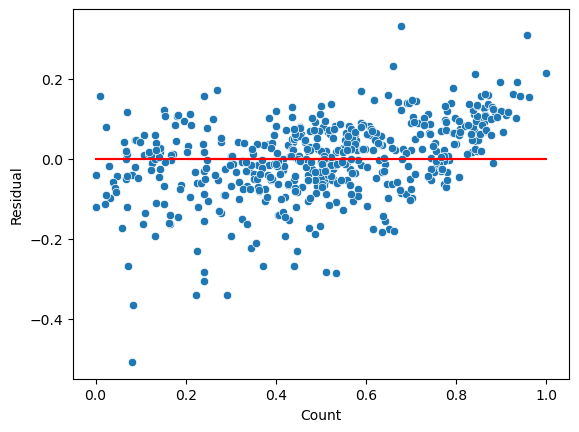

In [97]:
y_train_pred = lr4.predict(X_train_lm4)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [98]:
# Absence of multicolinerity 

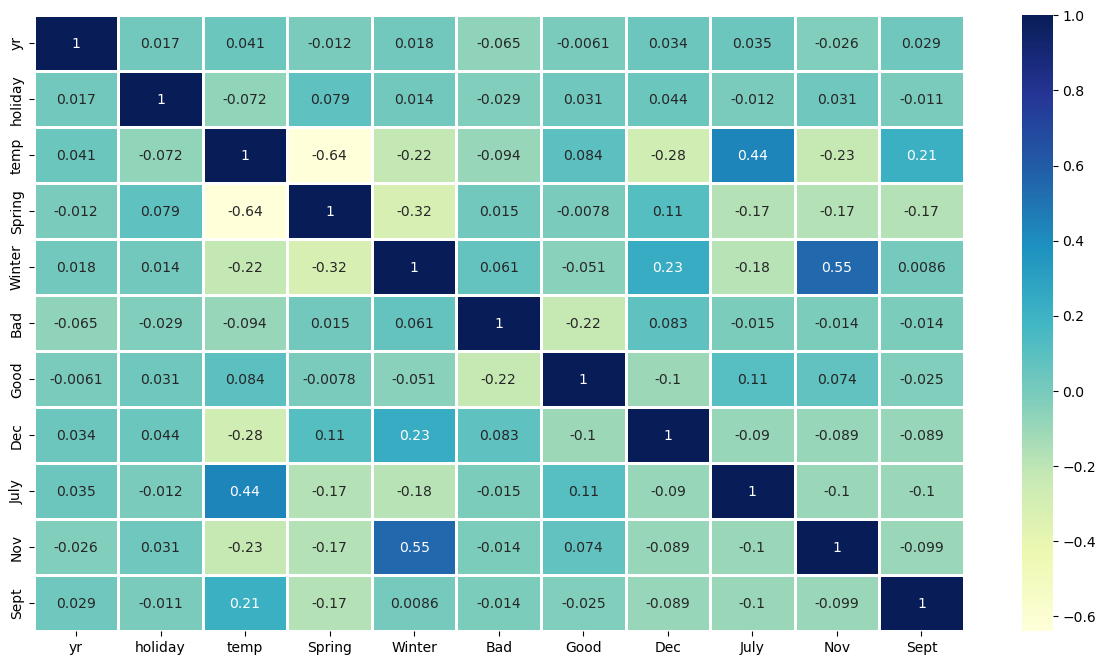

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

In [100]:
calculateVIF(X_train_new) # All vif are below 5 

,Features,VIF
2,temp,3.87
6,Good,2.80
4,Winter,2.33
0,yr,2.07
9,Nov,1.78
3,Spring,1.42
8,July,1.38
7,Dec,1.31
10,Sept,1.22
5,Bad,1.08


In [101]:
# Error Normality checking 

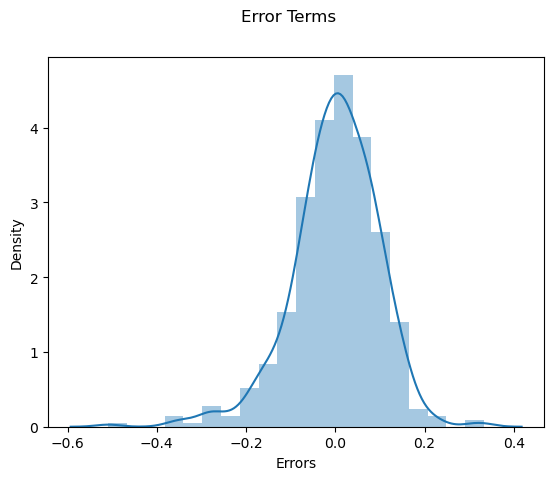

In [102]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

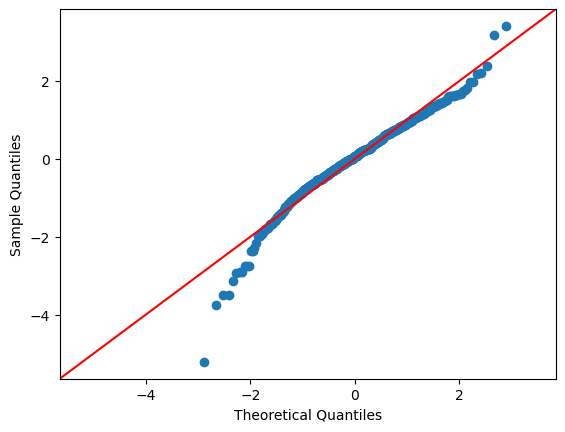

In [103]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

In [104]:
# Data Scaling for Testing a data set 

In [105]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])


In [106]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [107]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,1,...,0,0,0,0,0,0,1,0,0,0
148,0,0,1,0.758058,0.704203,0.843709,0.479765,0.526017,0,1,...,1,0,0,0,0,0,0,0,1,0
302,0,0,1,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,0,0,1,0,0,0,0,0,1,0
355,0,0,0,0.453814,0.455552,0.780592,0.062325,0.318363,1,0,...,0,0,0,0,0,1,0,0,0,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,1,...,1,0,0,0,0,0,0,0,0,0


In [108]:
#bike_test.describe()

In [109]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [110]:
y_test

468    0.848606
148    0.526017
302    0.350115
355    0.318363
515    0.833877
         ...   
532    0.790414
558    0.853314
137    0.413377
314    0.354582
683    0.605336
Name: cnt, Length: 220, dtype: float64

In [111]:
X_test.head(1)

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [112]:
col1=X_train_new.columns


In [113]:
col1

Index(['yr', 'holiday', 'temp', 'Spring', 'Winter', 'Bad', 'Good', 'Dec',
       'July', 'Nov', 'Sept'],
      dtype='object')

In [114]:
X_test=X_test[col1]

In [115]:
X_test

,yr,holiday,temp,Spring,Winter,Bad,Good,Dec,July,Nov,Sept
468,1,0,0.543115,0,0,0,1,0,0,0,0
148,0,0,0.758058,0,0,0,1,0,0,0,0
302,0,0,0.324018,0,1,0,1,0,0,0,0
355,0,0,0.453814,1,0,0,0,1,0,0,0
515,1,0,0.773634,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
532,1,0,0.664605,0,0,0,1,0,0,0,0
558,1,0,0.838014,0,0,0,0,0,1,0,0
137,0,0,0.611648,0,0,0,0,0,0,0,0
314,0,1,0.330249,0,1,0,1,0,0,1,0


In [116]:
#Selecting the variables that were part of final model.

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.head(1)
#X_test_lm5.info()

,const,yr,holiday,temp,Spring,Winter,Bad,Good,Dec,July,Nov,Sept
468,1.0,1,0,0.543115,0,0,0,1,0,0,0,0


In [117]:
y_pred = lr4.predict(X_test_lm5)

In [118]:
print (y_pred)

468    0.674353
148    0.524843
302    0.430958
355    0.093493
515    0.773414
         ...   
532    0.726561
558    0.664065
137    0.378559
314    0.272789
683    0.504890
Length: 220, dtype: float64


In [119]:
r2=round(r2_score(y_test,y_pred),2)
r2

0.81

In [120]:
n=X_test.shape[0]
print(n)
p=X_test.shape[1]
print(p)
adjustedr2=1-(1-r2)*(n-1)/(n-p-1)
adjustedr2

220
11


0.7999519230769232

- Measurement        Train DataSet      Test DataSet 
- R2 Value              82.2%                81 % 
- Adj R2 Value          82.6%                80 %

In [121]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0757

Text(0, 0.5, 'y_pred')

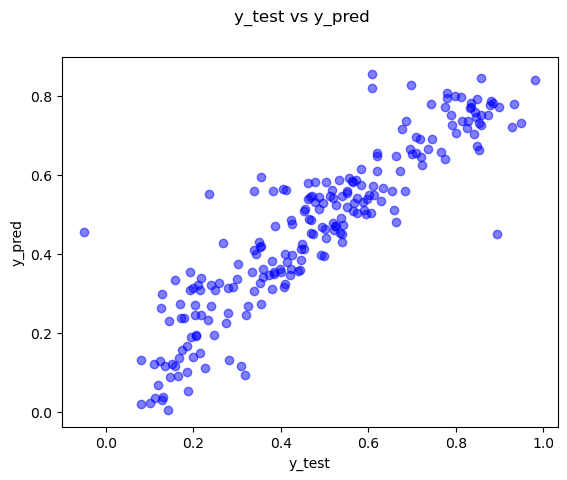

In [122]:
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5,c='b')
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 